In [1]:
!python --version

Python 3.11.4


In [2]:
import os
os.getcwd()

'C:\\Users\\ual-laptop\\Downloads\\Lab6\\Lab6'

***
***

<div class="alert alert-danger">

## Before you continue!

Before we get started, let's first install the modules we'll be using. To do this, navigate to the Launcher tab and open a new Terminal. Run this command:
    
```python
pip3 install --user 'gensim' 'nltk' 'beautifulsoup4' 'urllib3' 'readability' 'readability-lxml' 'empath'
```
    
<p style="text-align:center;">
        <img src=Images/Launch_Terminal.png width=500 class="center">
</p>


Finally, re-open this Notebook.
    
***NOTE 1:*** You only need to install once!

***NOTE 2:*** This will take a few minutes... (be patient!)
    
</div>

***
***

## Text as Data: An Introduction to Natural Language Processing (NLP)

NLP stands for Natural Language Processing and it involves a huge variety of tasks such as:
- Automatic summarization
- Discourse analysis
- Machine translation
- Named entity recognition
- Part-of-speech tagging
- Parsing
- Question answering
- Relationship extraction
- Sentiment analysis
- Speech recognition
- Topic segmentation
- Word segmentation
- Information retrieval
- Information extraction
- Speech processing

The key idea is that there are times when we would much prefer to process a heap of text without having to read it ourselves. Reading is, of course, energy- and time-intensive. Reading the entire corpus of fiction written in English from the 15th century to the 18th century, for instance, would take years. But with NLP, we can have a computer do the same thing in a relatively short time, letting us answer fascinating questions that would otherwise be out of reach.

Python is built in with a very mature regular expression library, which is the building block of Natural Language Processing. Traditionally, in the Python ecosystem the Natural Language Processing Toolkit, abbreviated as `NLTK`, has been until recently the only working choice.

Natural Language Processing (NLP) is often taught at the academic level from the perspective of computational linguists. However, as social scientists, we have a richer view of the natural language world &mdash; unstructured data that by its very nature has latent information that is important to humans. NLP practitioners have benefited from machine learning techniques to unlock meaning from large corpora, and we’ll explore how to do that particularly with Python and with the Natural Language Toolkit (NLTK). 

NLTK is an excellent library for machine-learning based NLP, written in Python by experts from both academia and industry. Python allows you to create rich data applications rapidly, iterating on hypotheses. The combination of Python + NLTK means that you can easily add language-aware data products to your larger analytical workflows and applications. 
    
**Requirements: You will need to have NLTK installed, along with downloading the corpus for stopwords. To download everything with a conda installation, see below.**

***
***

## Introduction to NLP with NLTK

`NLTK` stands for the Natural Language Toolkit and it provides a combination of natural language corpora, lexical resources, and example grammars with language processing algorithms, methodologies and demonstrations for a very pythonic "batteries included" view of Natural Language Processing.   

As such, `NLTK` is perfect for research-driven (hypothesis-driven) computational social science projects. Its suite of libraries includes:

- tokenization, stemming, and tagging
- chunking and parsing
- language modeling
- classification and clustering
- logical semantics

`NLTK` is also a useful pedagogical resource for learning NLP with Python and serves as a starting place for producing production grade code that requires natural language analysis. `NLTK` provides a variety of tools that can be used to explore the linguistic domain but is not a lightweight dependency that can be easily included in other workflows, especially those that require unit and integration testing or other build processes. This stems from the fact that `NLTK` includes a lot of added code but also a rich and complete library of corpora that power the built-in algorithms. 

***
## Starting with NLTK

This notebook has a few dependencies that we will be using (and should have already installed earlier): 

1. NLTK
2. The NLTK corpora 
3. The BeautifulSoup library
4. The gensim library

Now, let's import some of the packages we just installed (e.g., `nltk`, `gensim`) and some others we've used (e.g., `pandas`).

In [3]:
import random
import nltk
import gensim
import pandas as pd

from nltk.stem.porter import *

Now that we've imported these modules, we need download the necessary resources for `NLTK`. 

**Note:** This will likely take some time, especially if you're setting this up on your local machine or personal computer, depending on your internet speeds. 

In [4]:
nltk.download('punkt')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')
nltk.download('sinica_treebank')
nltk.download('reuters')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('brown')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to C:\Users\ual-
[nltk_data]     laptop\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package tagsets to C:\Users\ual-
[nltk_data]     laptop\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ual-laptop\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package sinica_treebank to C:\Users\ual-
[nltk_data]     laptop\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\sinica_treebank.zip.
[nltk_data] Downloading package reuters to C:\Users\ual-
[nltk_data]     laptop\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet to C:\Users\ual-
[nltk_data]     laptop\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to C:\Users\ual-
[nltk_data]     laptop\AppData\Roaming\nltk_data...
[nltk_

True

***
***

## Preprocessing Text Data - Tokenization, Stemming, Lemmatization, and Stop Words

In English (and many other languages), context indicates gender, tense, quantity, etc. but these subtleties might not be necessary. It is helpful for many applications to normalize these word forms (especially applications like search) into some canonical word for further exploration. This is where stemming and lemmatization come in. 

***

### Tokenization

The fundamental "datum" for NLP is the token. Tokens are another way of saying terms and words that are made distinct by punctuation, capitalization, or verb conjugations (more on this in a bit). It is a necessary preprocessing step for NLP applications. Tokenization involves segmenting text into tokens. Let's look at the following string:

In [5]:
text = "Are you crazy? I don't know."

It often makes sense to force the text into lowercase. Recall from our first week that computers view "Crazy" as a different string from "crazy" and different still from "CrazY" due to the placement of the upper-case letters. If you want to count these as the same term, turning each of these strings into lowercase helps solve that problem.

Let's give that a try.

In [6]:
text = text.lower()

Let's see what the text looks like now.

In [7]:
text

"are you crazy? i don't know."

Before moving on, be aware that there are in fact scenarios where you might care about the difference between upper-case and lower-case spellings, and thus would **not** want to reduce text to lower-case in NLP work. In English, for instance, "China" has a different meaning than "china". Further, some languages like German use capitalization to indicate the difference between nouns and non-nouns that are spelled in the same manner. If you expect distinctions like these to matter in your corpora, it might be wise to leave the casing as-is, since you risk conflating the terms by reducing the text to lower-case.

Back to NLP! To work with our text, we need to split the sentence up into its tokens. A simple method is just to split based on white space. 

***Note*** that this doesn't work for many other languages (e.g., Japanese, Greek, Chinese). 

In [8]:
text.split()

['are', 'you', 'crazy?', 'i', "don't", 'know.']

We will now explore tokenization as provided by two NLP tools: `NLTK` and `gensim`. First, look at how `NLTK` tokenizes words:

In [9]:
nltk.word_tokenize(text)

['are', 'you', 'crazy', '?', 'i', 'do', "n't", 'know', '.']

The `nltk` package is great to use. Now, let's look at how `Gensim` is handling tokenization

In [10]:
list(gensim.utils.tokenize(text))

['are', 'you', 'crazy', 'i', 'don', 't', 'know']

Which one do you think worked better? As we'll see, we'll want to remove punctuation and filler words that offer little added meaning to our analyses (e.g., prepositions, articles, pronouns, etc.). NLTK happens to keep more of this information. Gensim, on the other hand, may have trouble disaggregating "don't" from "don" (e.g. Don Draper) after tokenization, depending on how we process the data (there are simple ways to deal with this).

One of the key takeaways on working text as data is that no one approach will be perfect. 

***
***

<div class="alert alert-block alert-success">

# Checkpoint 1

Now you try!

Make-up your own sentence and save it as `my_sentence`. 

Be sure to include punctuation, random capitalization, etc. This isn't an English class, so no need to worry about proper grammar. 

Change the text to lower case, convert the text to a list of strings based on the white spaces, and use `gensim` to tokenize it. 

In [15]:
my_sentence = "A Quick Brown Fox, jumps over the lazy dog"

In [16]:
my_sentence = my_sentence.lower()
my_sentence

'a quick brown fox, jumps over the lazy dog'

In [17]:
my_sentence.split()

['a', 'quick', 'brown', 'fox,', 'jumps', 'over', 'the', 'lazy', 'dog']

In [18]:
nltk.word_tokenize(my_sentence)

['a', 'quick', 'brown', 'fox', ',', 'jumps', 'over', 'the', 'lazy', 'dog']

In [19]:
list(gensim.utils.tokenize(my_sentence))

['a', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

***
***

### Non-English and Non-Romanized Languages

Working with text that is not in English and/or does not use the roman alphabet is common. These techniques are just as applicable, however our focus here will be English. Just to give an example though: 

In [20]:
sentence = "今天天氣如何?"

In [21]:
tokens = nltk.word_tokenize(sentence)
print(tokens)

['今天天氣如何', '?']


In [22]:
from nltk.corpus import sinica_treebank

In [23]:
sinica_treebank.tagged_words()

[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]

***

### Stemming

[Stemming](http://en.wikipedia.org/wiki/Stemming) chops off affixes to get the root stem of the word. It is the process of reducing a word to its base/stem/root form. Most stemmers are pretty basic and just chop off standard affixes indicating things like tense (e.g., "-ed") and possessive forms (e.g., "-'s"). For instance:

    running --> run
    flowers --> flower
    geese   --> geese 

Once our tokens are stemmed, we can rest easy knowing that *BuzzFeed* and *BuzzFeed's* are now being counted together as... *buzzfe*? Don't worry: although this may look weird, it's pretty standard behavior for stemmers and won't affect our analysis (much). We also (probably) won't show the stemmed words to users &mdash; we'll normally just use them for internal analysis or indexing purposes.

There are several stemmers available:

    - Lancaster (English, newer and aggressive)
    - Porter (English, original stemmer)
    - Snowball (Many languages, newest)


`NLTK` has several stemmers already for our use (listed above). Let's import them first and we can use them to stem a sentence.

In [13]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer

Let's stem the following sentence: 

"The women running in the fog passed bunnies working as computer scientists."

Let's use the `word_tokenize` function form `NLTK` and then save these tokenized words in a `list` structure. 

In [25]:
text = list(nltk.word_tokenize("The women running in the fog passed bunnies working as computer scientists."))

Now, let's initialize the three different stemmers that we have at our disposal. 

Each has their strengths and weaknesses, so let's test them all and see how they each work.

In [26]:
snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()
porter = PorterStemmer()

Here, we have a for loop that will use these three stemmers &mdash; snowball, lancaster, and porter &mdash; to stem our above list. It will print out how our previous sentence is stemmed using these three different approaches. 

In [27]:
for stemmer in (snowball, lancaster, porter):
    stemmed_text = [stemmer.stem(t) for t in text]
    print(" ".join(stemmed_text))

the women run in the fog pass bunni work as comput scientist .
the wom run in the fog pass bunny work as comput sci .
the women run in the fog pass bunni work as comput scientist .


The `snowball` stemmer produced the sentence as: "the women run in the fog pass bunni work as comput scientist ."

The `lancaster` stemmer produced: "the wom run in the fog pass bunny work as comput sci ."

The `porter` stemmer produced: "the women run in the fog pass bunni work as comput scientist ."

As you can surmise, no one stemmer is going to be perfect.

***
***

<div class="alert alert-block alert-success">

# Checkpoint 2 

Now you try!

Come up with another sentence, different than the one you used in the first checkpoint. 

Follow the same procedures here and stem the sentence using all three techniques: `snowball`, `lancaster`, and `porter`. 

Print out the stemmed sentences. What one did the best? How do they differ?

In [29]:
sent = "The Indus Valley Civilisation, was a Bronze Age civilisation in the northwestern regions of South Asia."

In [30]:
tokenized_sent = list(nltk.word_tokenize(sent))

In [32]:
snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()
porter = PorterStemmer()

In [33]:
for stemmer in (snowball, lancaster, porter):
    stemmed_text = [stemmer.stem(t) for t in tokenized_sent]
    print(" ".join(stemmed_text))

the indus valley civilis , was a bronz age civilis in the northwestern region of south asia .
the ind valley civil , was a bronz ag civil in the northwestern reg of sou as .
the indu valley civilis , wa a bronz age civilis in the northwestern region of south asia .


snowball did a better job

***
***

### Lemmatization

Although the stemmer very helpfully chopped off pesky affixes (and made everything lowercase to boot), there are some word forms that give stemmers indigestion, especially *irregular* words. While the process of stemming typically involves rule-based methods of stripping affixes (making them small & fast), **lemmatization** involves dictionary-based methods to derive the canonical forms (i.e., *lemmas*) of words. For example, *run*, *runs*, *ran*, and *running* all correspond to the lemma *run*. 

    women   --> woman
    foxes   --> fox
    sheep   --> sheep
    
However, lemmatizers are generally big, slow, and brittle due to the nature of the dictionary-based methods, so you'll only want to use them when necessary.

The example below compares the output of the Snowball stemmer with the WordNet lemmatizer (also distributed with NLTK). Notice that the lemmatizer correctly converts *women* into *woman*, while the stemmer turns *lying* into *lie*. Additionally, both replace *eyes* with *eye*, but neither of them properly transforms *told* into *tell*.

In [34]:
temp_sent = "Several women rolled their eyes at the words the lying man told."

Now, let's establish the lemmatizer with one in the `NLTK` toolkit called `WordNetLemmatizer()`. First import it, and then set it up as `lemmatizer`.

In [35]:
from nltk.stem.wordnet import WordNetLemmatizer

In [36]:
lemmatizer = nltk.WordNetLemmatizer()

In [37]:
print([lemmatizer.lemmatize(t) for t in nltk.word_tokenize(temp_sent)])

['Several', 'woman', 'rolled', 'their', 'eye', 'at', 'the', 'word', 'the', 'lying', 'man', 'told', '.']


Let's compare this to one of the stemmers, let's say the `Snowball` stemmer.

In [38]:
print([snowball.stem(t) for t in nltk.word_tokenize(temp_sent)])

['sever', 'women', 'roll', 'their', 'eye', 'at', 'the', 'word', 'the', 'lie', 'man', 'told', '.']


As you can see, the stemmer does a much better job than the lemmatizer. 

Again, there's no one silver bullet that will always work perfectly. 

***
***

<div class="alert alert-block alert-success">

# Checkpoint 3 
    
Now you try!

Use the sentence you came up with for the second checkpoint and use the lemmatizer. How did the lemmatize method do compared to the stemming?

In [39]:
sent = "The Indus Valley Civilisation, was a Bronze Age civilisation in the northwestern regions of South Asia."

In [40]:
from nltk.stem.wordnet import WordNetLemmatizer

In [41]:
lemmatizer = nltk.WordNetLemmatizer()

In [42]:
print([lemmatizer.lemmatize(t) for t in nltk.word_tokenize(sent)])

['The', 'Indus', 'Valley', 'Civilisation', ',', 'wa', 'a', 'Bronze', 'Age', 'civilisation', 'in', 'the', 'northwestern', 'region', 'of', 'South', 'Asia', '.']


In [43]:
print([snowball.stem(t) for t in nltk.word_tokenize(sent)])

['the', 'indus', 'valley', 'civilis', ',', 'was', 'a', 'bronz', 'age', 'civilis', 'in', 'the', 'northwestern', 'region', 'of', 'south', 'asia', '.']


stemmer did a better job than the lemmatizer here

***
***

### Stop Words and Filtering Out Punctuation

Many extremely common words which would appear to be of little value are excluded from the vocabulary entirely. These words include conjunctions (e.g., and, but, or, etc.) prepositions (e.g., between, under, around, etc.), articles (e.g., the, an, etc.), pronouns (e.g., him, her, they, etc.), etc. As you may have noticed in the above examples, we included them in our analyses. 

They are called [*stop words*](http://en.wikipedia.org/wiki/Stop_words). What we need to do is filter them out in order to focus on just the important material.

While there is no single, definitive list of stop words, but `NLTK` provides a decent start. Let's load it up and take a look at what we get:

In [44]:
sorted(nltk.corpus.stopwords.words('english'))[:25]

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both']

Let's use the stemming code from above, but now let's filter out these stopwords.

In [45]:
print([snowball.stem(t) for t in nltk.word_tokenize(temp_sent) if t not in nltk.corpus.stopwords.words('english')])

['sever', 'women', 'roll', 'eye', 'word', 'lie', 'man', 'told', '.']


When we compare it to the original, we can see that we've removed some stopwords:

In [46]:
print([snowball.stem(t) for t in nltk.word_tokenize(temp_sent)])

['sever', 'women', 'roll', 'their', 'eye', 'at', 'the', 'word', 'the', 'lie', 'man', 'told', '.']


***
***

<div class="alert alert-block alert-success">

# Checkpoint 4 

Now you try!

Use the sentence you used in the second and third checkpoints and use list comprehension (e.g., `[x for x in some_list]`) to remove stop words from your sentence. 

DO NOT LEMMATIZE OR STEM HERE, AS SHOWN IN THE ABOVE EXAMPLE! Just remove the stopwords. 

In [47]:
sent = "The Indus Valley Civilisation, was a Bronze Age civilisation in the northwestern regions of South Asia."

In [48]:
print([snowball.stem(t) for t in nltk.word_tokenize(sent) if t not in nltk.corpus.stopwords.words('english')])

['the', 'indus', 'valley', 'civilis', ',', 'bronz', 'age', 'civilis', 'northwestern', 'region', 'south', 'asia', '.']


***
***

### Punctuation Removal 

Finally, there's one last issue: punctuation. As you can see from above, a period is being considered a token. You might have also noticed that apostrophes were also being included after tokenization, stemming, and/or lemmatization. 

To address this, let's use the `string` package to remove them. First, import the module.

In [49]:
import string

Now, let's get the punctuations we want to remove and save it as `punctuation`.

In [50]:
punctuation = string.punctuation

Now, let's see what punctuation is included and will subsequently be removed:

In [51]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

This is, in fact, one large string of all of the different punctuations we would want to strip away from any token and sentence. The great thing about `Python` is that we can easily test if a token is in this string.

Let's add to our stemmer/stopword code above, and add in a second if statement to stop tokens that are in the punctuation list. 

In [52]:
print([snowball.stem(t) for t in nltk.word_tokenize(temp_sent) if t not in punctuation and t not in nltk.corpus.stopwords.words('english')])

['sever', 'women', 'roll', 'eye', 'word', 'lie', 'man', 'told']


Comparing the above output to what we were getting earlier, we now removed the period. 

***
***

<div class="alert alert-block alert-success">

# Checkpoint 5 

Now you try!

Use the sentence you used in the second, third, and fourth checkpoints and use list comprehension (e.g., `[x for x in some_list]`) to remove punctuation from your sentence. 

DO NOT LEMMATIZE, STEM, or REMOVE STOP WORDS HERE, AS SHOWN IN THE ABOVE EXAMPLE! Just remove punctuation. 

In [55]:
sent = "The Indus Valley Civilisation, was a Bronze Age civilisation in the northwestern regions of South Asia."

In [53]:
import string

In [54]:
punctuation = string.punctuation

In [56]:
print([snowball.stem(t) for t in nltk.word_tokenize(sent) if t not in punctuation and t not in nltk.corpus.stopwords.words('english')])

['the', 'indus', 'valley', 'civilis', 'bronz', 'age', 'civilis', 'northwestern', 'region', 'south', 'asia']


***
***

### Text Normalization: Bringing It All Together

Typical normalization of text for use as features in machine learning models looks something like this:

In [57]:
lemmatizer  = WordNetLemmatizer()
stopwords   = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation #This is from the module string

Below, I defined a function called `normalize` that takes in text as one long string. It first tokenizes and lemmatizes it; and then it removes stopwords and punctuation. 

It uses `nltk` to go break up the sentence into tokens and uses a for loop to process each token.

In [58]:
def normalize(text):
    for token in nltk.word_tokenize(text):
        token = token.lower()
        token = lemmatizer.lemmatize(token)
        if token not in stopwords and token not in punctuation:
            yield token

Let's test it out with a simple sentence

In [59]:
print(list(normalize("The eagle flies at midnight.")))

['eagle', 'fly', 'midnight']


***
***
<div class="alert alert-block alert-success">

# Checkpoint 6 

Now you try!

Write a new sentence and save it as a string. 

Use the `normalize()` function I wrote and use it to tokenize, lemmatize, and remove stopwords and punctuation. 
Print out the output, but be sure to capture the output as a `list()`, as the example shows. 

In [60]:
lemmatizer  = WordNetLemmatizer()
stopwords   = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation

In [61]:
def normalize(text):
    for token in nltk.word_tokenize(text):
        token = token.lower()
        token = lemmatizer.lemmatize(token)
        if token not in stopwords and token not in punctuation:
            yield token

In [62]:
sent2 = "Ashoka was the third ruler of the Maurya dynasty and was one of the most powerful kings in ancient times."

In [63]:
print(list(normalize(sent2)))

['ashoka', 'wa', 'third', 'ruler', 'maurya', 'dynasty', 'wa', 'one', 'powerful', 'king', 'ancient', 'time']


***
***

### Frequency Counts

Here's a little secret: much of NLP (and data science, for that matter) boils down to counting things. 

If you've got a bunch of data that needs analyzing but you don't know where to start, counting things is usually a good place to begin. Sure, you'll need to figure out exactly what you want to count, how to count it, and what to do with the counts, but if you're lost and don't know what to do, **just start counting**.

`NLTK` provides two very excellent classes to enable these frequency analyses:

- `FreqDist`
- `ConditionalFreqDist` 

And these two classes serve as the foundation for most of the analyses that we will conduct.

Perhaps we'd like to begin (as is often the case in NLP) by examining the words that appear in our document. To do that, we'll first need to tokenize the text string into discrete words. Since we're working with English, this isn't so bad, but if we were working with a non-whitespace-delimited language like Chinese, Japanese, or Korean, it would be much more difficult, as discussed above.

In the code snippet below, we're using two of NLTK's tokenize methods to first chop up the article text into sentences, and then each sentence into individual words. (Technically, we didn't need to use <code>sent_tokenize()</code>, but if we only used <code>word_tokenize()</code> alone, we'd see a bunch of extraneous sentence-final punctuation in our output.) 

By printing each token alphabetically, along with a count of the number of times it appeared in the text, we can see the results of the tokenization. Note that the output might contain some punctuation & numbers, hasn't been lowercased, and would count things like *BuzzFeed* and *BuzzFeed's* separately. We'll tackle some of those issues next.

Let's begin with a longer string, the opening of a "Tale of Two Cities" by Charles Dickens:

`It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way—in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.`

- `sent_tokenize`: This tokenizer divides a text (e.g., text from a document or a paragraph) into a list made up of sentences (i.e., sent_ == 'sentence'). 
    
       
- `word_tokenize`: This tokenizer uses regular expressions to tokenize text as in Penn Treebank. It assumes that the text has already been segmented into sentences, e.g. using ``sent_tokenize()``.
    


In [5]:
text = 'It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way—in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.'

In [65]:
tokens = [word for sentence in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sentence.lower()) if word not in stopwords and word not in punctuation]

Let's see what this looks like.

In [66]:
print(tokens)

['best', 'times', 'worst', 'times', 'age', 'wisdom', 'age', 'foolishness', 'epoch', 'belief', 'epoch', 'incredulity', 'season', 'light', 'season', 'darkness', 'spring', 'hope', 'winter', 'despair', 'everything', 'us', 'nothing', 'us', 'going', 'direct', 'heaven', 'going', 'direct', 'way—in', 'short', 'period', 'far', 'like', 'present', 'period', 'noisiest', 'authorities', 'insisted', 'received', 'good', 'evil', 'superlative', 'degree', 'comparison']


Now that we have tokenized this long string, let's get a frequency count of how often each token occurs. 

This is going to take a few steps. First we need the unique list of tokens. We can do this with the code 

`set(tokens)`

Let's look at these tokens alphabetically, say the first 30. We don't *need* to look at them alphabetically; there are lots of ways to look at which terms happen more frequently. Here, I choose to look at it this way as just one helpful way to explore a corpus. 

We can do so using `sorted()`, which will sort this list of tokens.

We can pass in each individual token from this unique list back into `tokens` to get its count. In other words, let's create a for loop that will go through each of these unique tokens and return how often it occurs in this text.  

In [67]:
for individual_token in sorted(set(tokens)):
    print(individual_token + ' | Count: ' + str(tokens.count(individual_token)))

age | Count: 2
authorities | Count: 1
belief | Count: 1
best | Count: 1
comparison | Count: 1
darkness | Count: 1
degree | Count: 1
despair | Count: 1
direct | Count: 2
epoch | Count: 2
everything | Count: 1
evil | Count: 1
far | Count: 1
foolishness | Count: 1
going | Count: 2
good | Count: 1
heaven | Count: 1
hope | Count: 1
incredulity | Count: 1
insisted | Count: 1
light | Count: 1
like | Count: 1
noisiest | Count: 1
nothing | Count: 1
period | Count: 2
present | Count: 1
received | Count: 1
season | Count: 2
short | Count: 1
spring | Count: 1
superlative | Count: 1
times | Count: 2
us | Count: 2
way—in | Count: 1
winter | Count: 1
wisdom | Count: 1
worst | Count: 1


Thus far, we've been working with lists of tokens that we're manually sorting, uniquifying, and counting &mdash; all of which can get to be a bit cumbersome. Fortunately, NLTK provides a data structure called <code>FreqDist</code> that makes it more convenient to work with these kinds of frequency distributions. The code snippet below builds a <code>FreqDist</code> from our list of stemmed tokens, and then displays the top 25 tokens appearing most frequently in the text of our article.

In [68]:
fdist  = nltk.FreqDist(tokens)

Here, `fdist` is a special `dictionary` with value-key pairing. Let's use a for loop and see what's inside. 

To do so, let's use the `items()` method to extract the value-key pairs and turn it into a list. (This makes dealing with it much easier.) Now, let's loop through each item and print out both the term and the frequency count.

In [69]:
for term, count in list(fdist.items()): 
    print(term + " " + str(count))


best 1
times 2
worst 1
age 2
wisdom 1
foolishness 1
epoch 2
belief 1
incredulity 1
season 2
light 1
darkness 1
spring 1
hope 1
winter 1
despair 1
everything 1
us 2
nothing 1
going 2
direct 2
heaven 1
way—in 1
short 1
period 2
far 1
like 1
present 1
noisiest 1
authorities 1
insisted 1
received 1
good 1
evil 1
superlative 1
degree 1
comparison 1


Notice now instead of being sorted alphabetically it's by order of appearance in the paragraph

So this is good. However, this text is short. If it were longer, it may not be really possible or beneficial to view the value-key pairs for the entire list of tokens. We can therefore only check a subset of them if we'd like to make sure it worked. 

In [70]:
number = 0
for term, count in list(fdist.items()):
    if number == 10: # setting the number of tokens you want it to print out 
        break
    print(term + " " + str(count))
    number += 1 # telling it to add +1 to the object `number` until it gets to 10 - then it breaks or stops

best 1
times 2
worst 1
age 2
wisdom 1
foolishness 1
epoch 2
belief 1
incredulity 1
season 2


This is also good. However, it doesn't help us discern what terms are more frequent. Thankfully, `fdist` has a method called `.most_common()` that will tell us the "n" most common terms found. 

In [71]:
print(fdist.most_common(20))

[('times', 2), ('age', 2), ('epoch', 2), ('season', 2), ('us', 2), ('going', 2), ('direct', 2), ('period', 2), ('best', 1), ('worst', 1), ('wisdom', 1), ('foolishness', 1), ('belief', 1), ('incredulity', 1), ('light', 1), ('darkness', 1), ('spring', 1), ('hope', 1), ('winter', 1), ('despair', 1)]


***
***

<div class="alert alert-block alert-success">


# Checkpoint 7 


Now you try!

Copy and paste a paragraph from a news article (e.g., CNN, BBC, etc.). Save this paragraph as a string called `my_news_article`. 

Remove stop words and punctuation and tokenize the terms in the sentence and calculate the frequency distribution. 

What are the 10 most common terms in your paragraph?

In [72]:
my_news_article = "In the early hours of 7 October, Hamas launched what it called Operation al-Aqsa Deluge, a multi-pronged attack on Israel, including Israeli border towns ringing the Gaza Strip. Thousands of rockets rained down on areas in Israel in the first few hours. These gave cover to Hamas militants, who sent armed drones to hit parts of Israel's electronic border alarm system, broke through Israeli military posts and the security fence around Gaza, or flew over the barrier in motorised hang gliders, penetrating urban areas and killing or kidnapping Israelis, many of them civilians, including children and elderly people. Some militants tried to infiltrate Israel by sea."

In [73]:
tokens = [word for sentence in nltk.sent_tokenize(my_news_article) for word in nltk.word_tokenize(sentence.lower()) if word not in stopwords and word not in punctuation]

In [74]:
print(tokens)

['early', 'hours', '7', 'october', 'hamas', 'launched', 'called', 'operation', 'al-aqsa', 'deluge', 'multi-pronged', 'attack', 'israel', 'including', 'israeli', 'border', 'towns', 'ringing', 'gaza', 'strip', 'thousands', 'rockets', 'rained', 'areas', 'israel', 'first', 'hours', 'gave', 'cover', 'hamas', 'militants', 'sent', 'armed', 'drones', 'hit', 'parts', 'israel', "'s", 'electronic', 'border', 'alarm', 'system', 'broke', 'israeli', 'military', 'posts', 'security', 'fence', 'around', 'gaza', 'flew', 'barrier', 'motorised', 'hang', 'gliders', 'penetrating', 'urban', 'areas', 'killing', 'kidnapping', 'israelis', 'many', 'civilians', 'including', 'children', 'elderly', 'people', 'militants', 'tried', 'infiltrate', 'israel', 'sea']


In [75]:
for individual_token in sorted(set(tokens)):
    print(individual_token + ' | Count: ' + str(tokens.count(individual_token)))

's | Count: 1
7 | Count: 1
al-aqsa | Count: 1
alarm | Count: 1
areas | Count: 2
armed | Count: 1
around | Count: 1
attack | Count: 1
barrier | Count: 1
border | Count: 2
broke | Count: 1
called | Count: 1
children | Count: 1
civilians | Count: 1
cover | Count: 1
deluge | Count: 1
drones | Count: 1
early | Count: 1
elderly | Count: 1
electronic | Count: 1
fence | Count: 1
first | Count: 1
flew | Count: 1
gave | Count: 1
gaza | Count: 2
gliders | Count: 1
hamas | Count: 2
hang | Count: 1
hit | Count: 1
hours | Count: 2
including | Count: 2
infiltrate | Count: 1
israel | Count: 4
israeli | Count: 2
israelis | Count: 1
kidnapping | Count: 1
killing | Count: 1
launched | Count: 1
many | Count: 1
militants | Count: 2
military | Count: 1
motorised | Count: 1
multi-pronged | Count: 1
october | Count: 1
operation | Count: 1
parts | Count: 1
penetrating | Count: 1
people | Count: 1
posts | Count: 1
rained | Count: 1
ringing | Count: 1
rockets | Count: 1
sea | Count: 1
security | Count: 1
sent | 

10 most common terms in your paragraph are israel, areas, border, gaza, hamas, hours, including, israeli, militants

***
***

### Scaling Up

Let's test this out with a much bigger corpus. Included with `nltk` is a corpus of news articles from Reuters, an international news agency. Let's define this corpus to a variable called `reuters`. 

In [76]:
reuters = nltk.corpus.reuters # Corpus of news articles

Now, let's convert the words in this corpus into counts, just as we did before. 

***Note:*** This may take a few moments to run.

In [77]:
counts  = nltk.FreqDist(reuters.words())

With counts, we can get the following descriptive features of the `reuters` corpus: 

- The vocabulary (unique words)
- The count of words
- The lexical diversity (the ratio of word count to vocabulary)

In [78]:
vocab   = len(counts.keys()) # Number of unique terms
words   = sum(counts.values()) # Total count of the words
lexdiv  = float(words) / float(vocab) # Lexical diversity

Now, let's see what the `reuters` corpus looks like. 

In [79]:
print("Corpus has %i types and %i tokens for a lexical diversity of %0.3f." % (vocab, words, lexdiv))

Corpus has 41600 types and 1720901 tokens for a lexical diversity of 41.368.


Just as before, we can calculate the n most common tokens in the corpus. Let's look at the n=40 most.

In [80]:
print(counts.most_common(40))  # The n most common tokens in the corpus

[('.', 94687), (',', 72360), ('the', 58251), ('of', 35979), ('to', 34035), ('in', 26478), ('said', 25224), ('and', 25043), ('a', 23492), ('mln', 18037), ('vs', 14120), ('-', 13705), ('for', 12785), ('dlrs', 11730), ("'", 11272), ('The', 10968), ('000', 10277), ('1', 9977), ('s', 9298), ('pct', 9093), ('it', 8842), (';', 8762), ('&', 8698), ('lt', 8694), ('on', 8556), ('from', 7986), ('cts', 7953), ('is', 7580), ('>', 7449), ('that', 7377), ('its', 7265), ('by', 6872), ('"', 6816), ('at', 6537), ('2', 6528), ('U', 6388), ('S', 6382), ('year', 6310), ('be', 6288), ('with', 5945)]


We can also find the most frequent token using `.max()`

In [81]:
print(counts.max()) # The most frequent token in the corpus

.


We can also calculate what percentage of the entire corpus a particular term is. For instance, let's consider "year":

In [82]:
counts.freq('year') * 100 # percentage of the corpus for this token

0.3666683905698236

The word "year" is only 0.367% of the total corpus. In other words, it's fairly small.

Let's test this out, for the 20 most common tokens (see above), let's see what the percentage they make up in the corpus. 

(Here, I'm going to use the function `round()` to round it off to two significant digits.)

In [83]:
for most_common, count_ in counts.most_common(20):
    print("Token " + most_common + " is " + str(round(counts.freq(most_common) * 100,2)) + "% of the corpus.")

Token . is 5.5% of the corpus.
Token , is 4.2% of the corpus.
Token the is 3.38% of the corpus.
Token of is 2.09% of the corpus.
Token to is 1.98% of the corpus.
Token in is 1.54% of the corpus.
Token said is 1.47% of the corpus.
Token and is 1.46% of the corpus.
Token a is 1.37% of the corpus.
Token mln is 1.05% of the corpus.
Token vs is 0.82% of the corpus.
Token - is 0.8% of the corpus.
Token for is 0.74% of the corpus.
Token dlrs is 0.68% of the corpus.
Token ' is 0.66% of the corpus.
Token The is 0.64% of the corpus.
Token 000 is 0.6% of the corpus.
Token 1 is 0.58% of the corpus.
Token s is 0.54% of the corpus.
Token pct is 0.53% of the corpus.


We can also plot these counts as well with the built-in method `.plot()`.

**Note:** You'll also need to use `%matplotlib inline` in order to show the plot. 

In [84]:
%matplotlib inline 

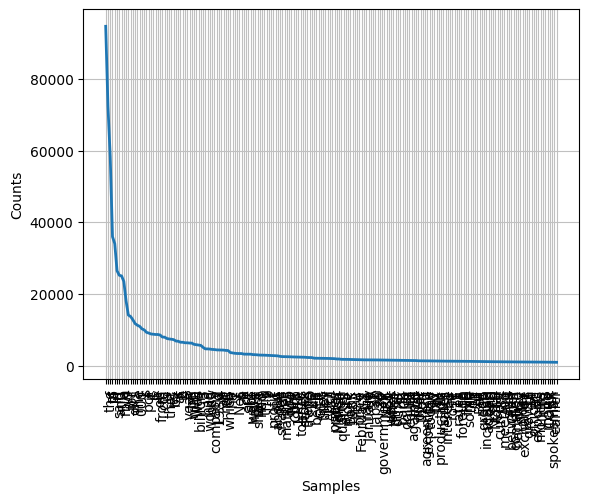

In [85]:
counts.plot(200, cumulative=False);

Alternatively, maybe you just want to display the top words found in the corpus. We can do that too!  
First, let's select out and save the 20 most common tokens into a dataframe.

In [86]:
top_words = pd.DataFrame(counts.most_common(20), columns=("key", "value"))
top_words.head()

,key,value
0,.,94687
1,",",72360
2,the,58251
3,of,35979
4,to,34035


Now let's bring back `plotnine` to create a nice `ggplot`-style plot. 

In [87]:
from plotnine import *

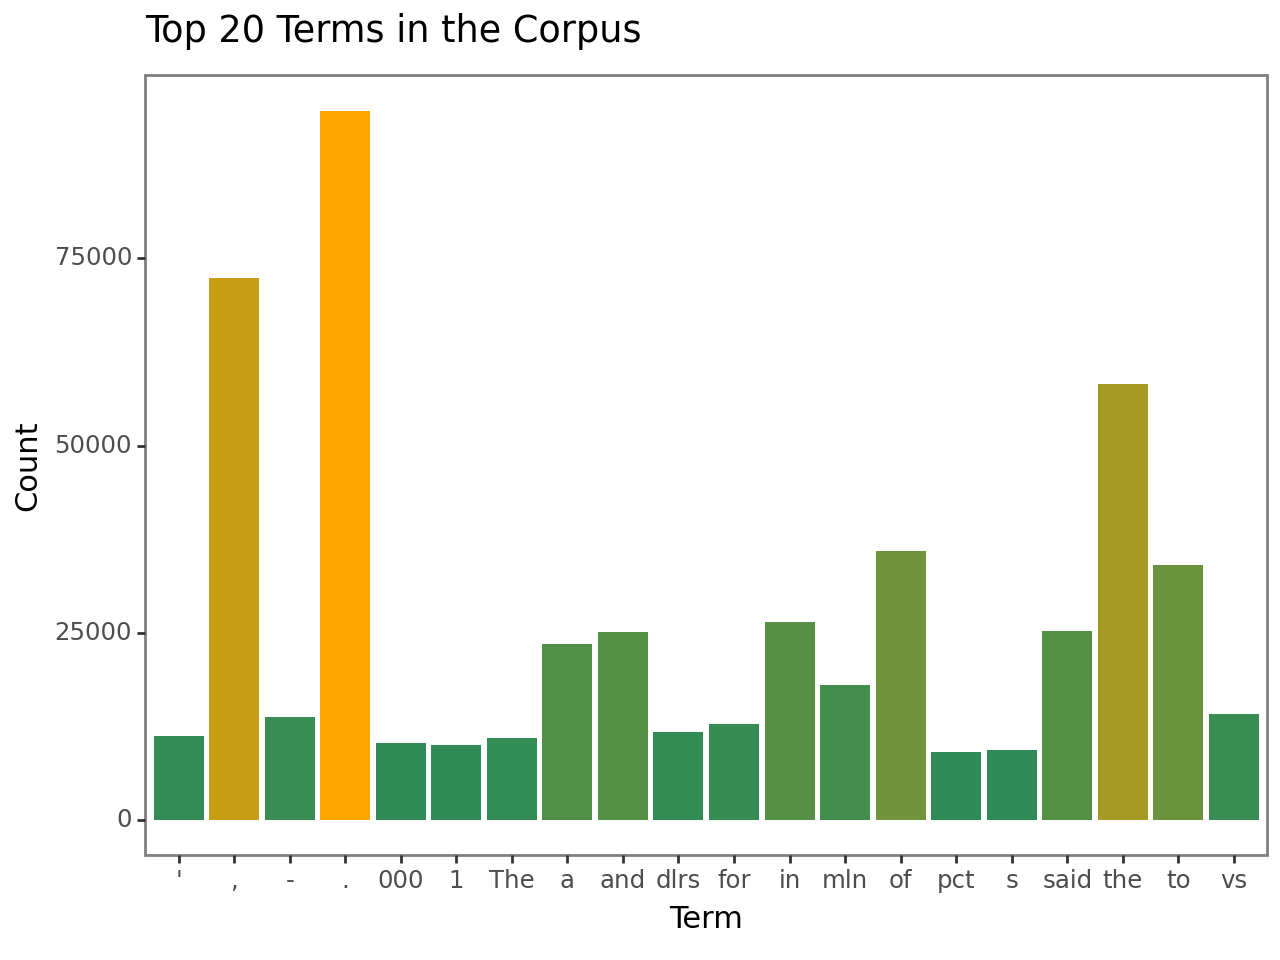

<Figure Size: (640 x 480)>

In [88]:
(ggplot(top_words, aes(x = 'key' , y = 'value', fill='value')) +
    geom_bar(stat='identity') +
    scale_fill_gradient(low = "seagreen", high = "orange", guide=False) +
    labs(title="Top 20 Terms in the Corpus") +
    xlab("Term" ) + ylab("Count") +
    theme_bw() + 
 theme(panel_grid=element_blank()))

***
***

<div class="alert alert-block alert-success">


# Checkpoint 8 

Now you try!

Read in another sample corpus from `nltk`. Let's use the corpus of U.S. president "State of the Union" speeches. 

First, download this corpus:

```Python 
nltk.download('state_union')
```

Then, import the corpus:

```Python
from nltk.corpus import state_union
```

Calculate its lexical diversity. Then, calculate the percentage of how frequently the most popular term occurs in this corpus. 

In [18]:
nltk.download('state_union')

[nltk_data] Downloading package state_union to C:\Users\ual-
[nltk_data]     laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!


True

In [19]:
from nltk.corpus import state_union

In [20]:
counts  = nltk.FreqDist(state_union.words())

In [93]:
vocab   = len(counts.keys()) # Number of unique terms
words   = sum(counts.values()) # Total count of the words
lexdiv  = float(words) / float(vocab) # Lexical diversity

In [94]:
print("Corpus has %i types and %i tokens for a lexical diversity of %0.3f." % (vocab, words, lexdiv))

Corpus has 14591 types and 399822 tokens for a lexical diversity of 27.402.


In [95]:
print(counts.most_common(40))  # The n most common tokens in the corpus

[('the', 19191), ('.', 17501), (',', 17484), ('of', 12854), ('to', 11868), ('and', 11748), ('in', 6936), ('a', 5837), ('our', 5141), ('we', 4338), ('that', 4309), ('for', 4070), ('is', 3621), ('I', 3394), ('will', 2959), ("'", 2620), ('have', 2486), ('be', 2481), ('this', 2323), ('are', 2273), ('We', 2063), ('-', 1971), ('on', 1857), ('with', 1825), ('it', 1767), ('by', 1717), ('as', 1663), ('all', 1612), ('not', 1591), ('must', 1568), ('The', 1520), ('--', 1519), ('s', 1410), ('can', 1396), ('more', 1369), ('people', 1291), ('their', 1287), ('has', 1240), ('world', 1128), ('year', 1097)]


***
***

### N-Grams

Most of the work we've seen so far only considers single terms. However, terms have modifiers like adjectives and adverbs (e.g., 'American history' or 'wonderfully dull'). Separating terms individually ignores the specific order that terms appear in, which potentially loses their meaning. 

To that end, we often use n-grams. They are simply all combinations of adjacent terms that you can find in your source text. Here, N is the number of terms that are adjacent and combined together to form one term. As an example, "hello, world!" contains the following:
 - Two unigrams (N=1): (1) Hello (2) World 
 - One bigram (N=2): (1) Hello World 
 
Or, consider the sentence "My name is Charlie Gomez": it consists of 
 - Five uni-grams (N=1):(1) My, (2) Name, (3) Is, (4) Charlie, (5) Gomez 
 - Four bi-grams (N=2): (1) My Name, (2) Name Is, (3) Is Charlie, (4) Charlie Gomez
 - Three tri-grams (N=3): (1) My Name Is, (2) Name Is Charlie, (3) Is Charlie Gomez 
 - Two quad-grams (N=4): My Name Is Charlie, (2) Name Is Charlie Gomez
 - One quint-gram (N=5): My Name Is Charlie Gomez

The basic point of n-grams is that they capture the language structure from a statistical point of view, like what term is likely to follow the given one. The longer the n-gram (the higher the N), the more context you have to work with. Optimum length really depends on the application &mdash; if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

Thankfully, `NLTK` takes care of this for us. 

In [1]:
from nltk.util import ngrams

Let's take our test from before and find all of the bi-grams (N=2). This is accomplished with the `ngrams()` function. 

We need to split the text into a list of terms (i.e., `text.split()`) and pass in N that we want; here we want N=2. 

In [6]:
bi_freq = nltk.FreqDist(ngrams(text.split(),2))

Now, let's take a look. 

In [7]:
bi_freq

FreqDist({('was', 'the'): 10, ('it', 'was'): 9, ('of', 'times,'): 2, ('times,', 'it'): 2, ('the', 'age'): 2, ('age', 'of'): 2, ('the', 'epoch'): 2, ('epoch', 'of'): 2, ('the', 'season'): 2, ('season', 'of'): 2, ...})

A lot of this will be noise, however, looking at the most common bigrams is helpful. Let's loop through `bi_freq` and see what the 10 most common bigrams are. 

In [8]:
for (w1, w2), count in bi_freq.most_common(10):
    print(w1, w2, count)

was the 10
it was 9
of times, 2
times, it 2
the age 2
age of 2
the epoch 2
epoch of 2
the season 2
season of 2


Let's repeat everything we just did for bigrams (N=2) and extend it to trigrams (N=3)

In [9]:
tri_freq = nltk.FreqDist(ngrams(text.split(), 3))

In [10]:
for (w1, w2, w3), count in tri_freq.most_common(10):
    print(w1, w2, w3, count)

it was the 9
of times, it 2
times, it was 2
was the age 2
the age of 2
was the epoch 2
the epoch of 2
was the season 2
the season of 2
before us, we 2


We can extend this out all the way to n=5.

In [11]:
for ngram in nltk.ngrams(["The", "bear", "walked", "in", "the", "woods", "at", "midnight"], 5):
    print(ngram)

('The', 'bear', 'walked', 'in', 'the')
('bear', 'walked', 'in', 'the', 'woods')
('walked', 'in', 'the', 'woods', 'at')
('in', 'the', 'woods', 'at', 'midnight')


***
***

<div class="alert alert-block alert-success">


# Checkpoint 9 

Now you try! 

Using the "State of the Union" speech corpus from the previous checkpoint. Pick **ONE** speech and calculate the frequency of all bigrams and trigrams in it.  

To get a random speech first do the following:
```Python
    import random
    speech = random.choice(union.fileids()) 
    text = union.raw(speech)
```

What stands out? Do these words make sense?

**NOTE:** The speeches are in chronological order, so you can think about what president said what and when. Can you guess which president is speaking based on the bi-grams and tri-grams?   
**HINT:** use `speech` to check the random speech chosen from the corpus. Were you right?

In [22]:
import random
speech = random.choice(state_union.fileids()) 
text = state_union.raw(speech)

In [23]:
text

'PRESIDENT LYNDON B. JOHNSON\'S ANNUAL MESSAGE TO THE CONGRESS ON THE STATE OF THE UNION\n \nJanuary 4, 1965\n\nMr. Speaker, Mr. President, Members of the Congress, my fellow Americans:\nOn this Hill which was my home, I am stirred by old friendships.\nThough total agreement between the Executive and the Congress is impossible, total respect is important.\nI am proud to be among my colleagues of the Congress whose legacy to their trust is their loyalty to their Nation.\nI am not unaware of the inner emotions of the new Members of this body tonight.\nTwenty-eight years ago, I felt as you do now. You will soon learn that you are among men whose first love is their country, men who try each day to do as best they can what they believe is right.\nWe are entering the third century of the pursuit of American union.\nTwo hundred years ago, in 1765, nine assembled colonies first joined together to demand freedom from arbitrary power.\nFor the first century we struggled to hold together the fir

In [24]:
from nltk.util import ngrams

In [25]:
bi_freq = nltk.FreqDist(ngrams(text.split(),2))

In [26]:
bi_freq

FreqDist({('of', 'the'): 40, ('in', 'the'): 27, ('I', 'will'): 19, ('to', 'the'): 19, ('and', 'the'): 18, ('of', 'our'): 16, ('that', 'we'): 14, ('the', 'American'): 9, ('we', 'have'): 9, ('that', 'is'): 9, ...})

In [27]:
for (w1, w2), count in bi_freq.most_common(10):
    print(w1, w2, count)

of the 40
in the 27
I will 19
to the 19
and the 18
of our 16
that we 14
the American 9
we have 9
that is 9


In [28]:
tri_freq = nltk.FreqDist(ngrams(text.split(), 3))

In [29]:
for (w1, w2, w3), count in tri_freq.most_common(10):
    print(w1, w2, w3, count)

I propose that 9
propose that we 9
In this period 5
the quality of 4
of the American 4
this period we 4
period we have 4
of the United 4
I will propose 4
in the history 3


*** 
*** 

### Term Frequency - Inverse Document Frequency (TF-IDF)

Consider a document that contains the word *baseball* 8 times. You might think, "wow, *baseball* isn't a stop word, and it appeared rather frequently here, so it's probably important." And you might be right. But what if that document is actually an article posted on a baseball blog? Won't the word *baseball* appear frequently in nearly every post on that blog? In this particular case, if you were generating a summary of this document, would the word *baseball* be a good indicator of importance, or would you maybe look for other words that help distinguish or differentiate this blog post from the rest?

Context is essential. What really matters here isn't the raw frequency of the number of times each word appeared in a document, but rather the **relative frequency** comparing the number of times a word appeared in this document against the number of times it appeared across the rest of the collection of documents. "Important" words will be the ones that are generally rare across the collection, but which appear with an unusually high frequency in a given document.

We'll calculate this relative frequency using a statistical metric called [term frequency - inverse document frequency (TF-IDF)](http://en.wikipedia.org/wiki/Tf%E2%80%93idf). We could implement TF-IDF ourselves using NLTK, but rather than bore you with the math, we'll take a shortcut and use the TF-IDF implementation provided by the [scikit-learn](http://scikit-learn.org/) machine learning library for Python.

***

### So what is TF-IDF?

TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

    TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

    IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

See below for a simple example.

**Example:**

Consider a document containing 100 words where the word "cat" appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents in our corpus, and the word cat appears in one thousands of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

***

### Building a Term-Document Matrix

We'll use scikit-learn's <code>TfidfVectorizer</code> class to construct a [term-document matrix](http://en.wikipedia.org/wiki/Document-term_matrix) containing the TF-IDF score for each word in each document in the Reuters Corpus. In essence, the rows of this sparse matrix correspond to documents in the corpus, the columns represent each word in the vocabulary of the corpus, and each cell contains the TF-IDF value for a given word in a given document.

Inspired by a [computer science lab exercise from Duke University](http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html), the code sample below iterates through the Reuters Corpus to build a dictionary of stemmed tokens for each article, then uses the <code>TfidfVectorizer</code> and scikit-learn's own built-in stop words list to generate the term-document matrix containing TF-IDF scores.

In [45]:
from nltk.corpus import reuters
import datetime, re, sys
from sklearn.feature_extraction.text import TfidfVectorizer


Here, I'm going to create a function that takes in text and both stems and tokenizes the text. This will save us some time when we start to construct tf-idfs. 

In [46]:
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    snowball = SnowballStemmer('english')
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [snowball.stem(t) for t in filtered_tokens]
    return stems

Let's use the `reuters` corpus again. However, the data structure that it is in can't be used right away. We first need to convert it from its current format into a `dictionary`. 

I'm going to first create an empty `dictionary` called `token_dict` and then populate it with each article from `reuters`.

To access each article from `reuters` I'm going to use its own method called `.fileids()`. 

***Note:*** Doing this is specific to `reuters` and probably won't be encountered with anything else you do in `Python`, so `.fileids()` isn't important to know. However, I think it is important to see how data can be stored in a myriad of ways and that you need to be ready for anything.

In [47]:
token_dict = {}
for article in reuters.fileids():
    token_dict[article] = reuters.raw(article)     

Now that we have stored the text from each article as its own unique key-value pair in the dictionary, let's define our tf-idf. 

Thanks to `nltk` this is mostly taken care of for us with `TfidfVectorizer()`. Here, I pass in our own tokenizing function that we just defined. (There is a default one, but the one we made is much more thorough.) I also specify that we want to remove all "English" stopwords. 

In [48]:
tfidf = TfidfVectorizer(tokenizer=tokenize_and_stem, stop_words='english', decode_error='ignore')

Now, we can build the term-to-document matrix. All we need to do is to take the tf-idf that we just defined, and pass in the text. Since we stored it as a `dictionary` we need to pass in its `.values()` to get the text. 

***Note***: This may take a few minutes to run:

In [49]:
tdm = tfidf.fit_transform(token_dict.values()) # this can take some time (about 60 seconds on my local machine)

Now that we've built the term-document matrix, we can explore its content.

First, let's get the total number of terms and documents in this corpus. We can partially do that by using the `.get_features_names()` method from the `tfidf` to extract the terms. Let's save that as `feature_names`.

In [57]:
feature_names = tfidf.get_feature_names_out()


We can also use the `tdm` to get the number of documents, using the `.shape[0]` to get the number of rows (i.e., documents).

In [56]:
print('TDM contains ' + str(len(feature_names)) + ' terms and ' + str(tdm.shape[0]) + ' documents.')

TDM contains 25810 terms and 10788 documents.


As we can see, the term-to-document matrix has over 20,000 terms and 10,000 documents. It's quite large.

Now, let's pick four terms at random. (I'm going to use the module `random` and the function `randint()` to do this.) 

In [58]:
from random import randint

As such, every time you run this code, it'll return something new! Try for yourself:

In [59]:
for i in range(0, 4):
    print('random term: ' + feature_names[randint(0,len(feature_names) - 1)])

random term: february-april
random term: voltag
random term: aca
random term: darlington


A tf-idf is a document specific value. Sometimes, it's helpful to know what a term's largest tf-idf value is in the corpus. Let's modify the for loop above and find out what the maximum tf-idf value is for 4 random terms. 

We can use both `feature_names` and the `tfm`. The `tfm` is the term-to-frequency matrix. It's VERY big, so it's stored in a special data format called a "sparse matrix" from the module `numpy`. As opposed to a `DataFrame` from `pandas`, these matrices are much more efficient with memory, but they're harder to wrangle with. 

Here, we're not going to go in to all of the details about how this works. Instead, let's focus on getting the tf-idf values. 

To get all tf-idf values for a term, we can retrieve it by using `tfm[:,term_index]`, where `term_index` refers to its specific "column" in the matrix. If this sounds confusing, don't worry, because `feature_names` matches to this index. 

In other words, the index of the term in `features_names` is the same as it is in `tfm`, where the terms are the columns in the matrix. To return columns with this special matrix, we need to use a `:` to return all rows in that specific column, or  `tfm[:,term_index]`, where the first element is the row index and the second element after the comma is the column index. 

In [60]:
for i in range(0, 4):
    random_term_index = randint(0,len(feature_names) - 1)
    random_term = feature_names[random_term_index]
    print("Random term " + random_term + " has a maximum tf-idf value of " + str(tdm[:,random_term_index].max()))

Random term ry has a maximum tf-idf value of 0.0764968311232103
Random term vaal has a maximum tf-idf value of 0.17660179337031345
Random term yom has a maximum tf-idf value of 0.06883857808179039
Random term fantasi has a maximum tf-idf value of 0.05944348479388557


You could also calculate it's average tf-idf score as well. (There's no one right way to do this.)

After you've passed the dictionary's .values() to build the term-to-document matrix, the tf-idf for every token inside every document is now stored inside the object `tdm`.  

It may be hard for some to visualize what's going on behind the scenes, and so we may want to view that data. However, if you `print(tdm)` you'll notice it's not really clear to read.  
Instead, we can create a dataframe out of that matrix, and can use the `feature_names` to label the columns:

In [61]:
df = pd.DataFrame(tdm.toarray(), columns = feature_names)

In [62]:
df.iloc[:,18450:18460] #just pulling out a random chunk of columns to view 

,prognost,program,programm,progress,prohibit,project,prolif,prolong,promac,promedico
0,0.0,0.027792,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.125073,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.06181,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10783,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
10784,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
10785,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
10786,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


Notice how the tokens are across the top as columns, and every document is along the side as rows. Each value is the tf-idf score for that token in each document in the corpus.

For instance, let's take the term "profit". 
Let's take a look at the column for "profit. Now because there's over 10,000 documents, we can sort the values by descending order. What's the max tf-idf score?

In [63]:
df[['profit']].sort_values(ascending=False, by='profit')

,profit
6798,0.655417
10408,0.648588
3675,0.648073
2658,0.622983
9135,0.604369
...,...
3774,0.000000
3775,0.000000
3776,0.000000
3778,0.000000


Here we see the highest tf-idf for the term "profit" is 0.66 in document 6798.   

Now going back to the original `tdm` matrix.   
If we were to calculate the max value using the `feature_names` and `tfm[:,term_index]`, we'd get the same value of 0.66!  
Don't believe me? Try it for yourself!

***
***

<div class="alert alert-block alert-success">


# Checkpoint 10 

Now you try! 

Using the "State of the Union" speech corpus, first create the term-to-document matrix. (Here, "document" refers to the individual speeches.) 

Calculate the number of terms and the number of documents (speeches) in the corpus. 

Extract the TF-IDF values for the term `congress` and report its average TF-IDF across documents. 

Now calculate the average TF-IDF value for the term `american`. How does it compare to the value for `congress`?

**Hint:** To find a specific term in the corpus, you'd do something along the following:
```Python
INDEX_TERM = feature_names.index("SOME_TERM")  # insert your own texts 
```
And then to find the average, try using:
```Python
AVG_TDIDF_TERM = tdm[:,INDEX_TERM].mean()  # insert your own texts 
```

In [64]:
from nltk.corpus import reuters
import datetime, re, sys
from sklearn.feature_extraction.text import TfidfVectorizer


In [65]:
import random
speech = random.choice(state_union.fileids()) 
congress_text = state_union.raw(speech)

In [66]:
congress_text

"PRESIDENT RONALD REAGAN'S ADDRESS BEFORE A JOINT SESSION OF CONGRESS ON THE STATE OF THE UNION\n \nFebruary 4, 1986\n\nMr. Speaker, Mr. President, distinguished Members of the Congress, honored guests, and fellow citizens:\nThank you for allowing me to delay my address until this evening. We paused together to mourn and honor the valor of our seven Challenger heroes. And I hope that we are now ready to do what they would want us to do: Go forward, America, and reach for the stars. We will never forget those brave seven, but we shall go forward.\nMr. Speaker, before I begin my prepared remarks, may I point out that tonight marks the 10th and last State of the Union Message that you've presided over. And on behalf of the American people, I want to salute you for your service to Congress and country. Here's to you! [Applause]\nI have come to review with you the progress of our nation, to speak of unfinished work, and to set our sights on the future. I am pleased to report the state of ou

In [67]:
def tokenize_and_stem(congress_text):
    tokens = [word for sent in nltk.sent_tokenize(congress_text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    snowball = SnowballStemmer('english')
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [snowball.stem(t) for t in filtered_tokens]
    return stems

In [74]:
token_dict = {}
for article in reuters.fileids():
    token_dict[article] = reuters.raw(article) 

In [69]:
tfidf = TfidfVectorizer(tokenizer=tokenize_and_stem, stop_words='english', decode_error='ignore')

In [70]:
tdm = tfidf.fit_transform(token_dict.values())

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'w

In [71]:
feature_names = tfidf.get_feature_names_out()

In [72]:
print('TDM contains ' + str(len(feature_names)) + ' terms and ' + str(tdm.shape[0]) + ' documents.')

TDM contains 25810 terms and 10788 documents.


***
***

## Web Scraping: Extracting Text from HTML

Now, we'll start with a pretty basic and commonly-faced task: extracting text content from an HTML page. Python's `urllib3` package  gives us the tools we need to fetch a web page from a given URL, but we see that the output is full of HTML markup that we don't want to deal with.

First, let's import it. 

In [79]:
!pip install --user gensim nltk beautifulsoup4 urllib3 readability readability-lxml empath

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/67.1 kB ? eta -:--:--
     ---------------------------------------- 67.1/67.1 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for readability: filename=readability-0.3.1-py3-none-any.whl size=35494 sha256=e723d4346ada5079d74b8ef35ca60a332c89f17f5b34625d9b83ac8d1c300e1d
  Stored in directory: c:\users\ual-laptop\appdata\local\pip\cache\wheels\2d\07\52\367d712825cfe4a19d6e9210fa3d3ea28fe57bdb1fd56

In [80]:
from urllib.request import urlopen

Let's test it out with some code from a news site called "venturebeat.com" (Although, this ought to work many different websites.)

In [88]:
url = "http://venturebeat.com/2014/07/04/facebooks-little-social-experiment-got-you-bummed-out-get-over-it/"
html = urlopen(url).read()

Let's see what this looks like (just a sneak-peek, so we'll only look at the first 500 characters.)

In [89]:
html[:500]

b'<!DOCTYPE html>\n<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:addthis="http://www.addthis.com/help/api-spec"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:addthis="http://www.addthis.com/help/api-spec"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js ie8 o'

That doesn't make any sense, unless you know `html`. Thankfully for us, we have options in `Python` that will help us extract useful information. 

***
***

<div class="alert alert-block alert-success">


# Checkpoint 11 

Now you try!

Pick the website so any news article (or any website with a lot of text). Use `urlopen` to read in the page's `HTML` and look at the first 500 characters. 

**Note:** You'll need a stable internet connection to this if you're not using it on the cloud. 

What do you see?


In [90]:
url2 = "https://www.reuters.com/world/middle-east/hamas-threatens-kill-captives-if-israel-strikes-civilians-2023-10-09/"
html2 = urlopen(url2).read()

In [92]:
html2[:500]

b'<!DOCTYPE html><html lang="en"><head><title>Hamas threatens to kill captives if Israel strikes civilians | Reuters</title><meta name="render_timestamp" content="2023-10-10T03:41:55.297Z"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="apple-itunes-app" content="app-id=602660809, app-argument=https://www.reuters.com/world/middle-east/hamas-threatens-kill-captives-if-israel-strikes-civilians-2023-10-09/?id=LPH3OY3QLJNDDAYIL4FEL4PDYU"/><script>(function(){\n      va'

***
***

### Stripping-out HTML formatting

Fortunately, we can use a method called `BeautifulSoup()` to get the raw text out of an HTML-formatted string. BeautifulSoup, is a Python library for pulling data out of HTML and XML files. It parses HTML content into an easily-navigable nested data structure.

It's still not perfect, though, since the output will contain page navigation and all kinds of other junk that we don't want, especially if our goal is to focus on the body content from a news article, for example.

In [93]:
import bs4
from bs4 import BeautifulSoup

For `BeautifulSoup` to work, just pass in the string (in this, called `html`) and specify the format of what the string represents (this case `html.parser`).

In [94]:
text = BeautifulSoup(html,'html.parser')

Now, take a look at how nicely it converted the raw text into actual 'XML'. It still looks overwhelming and it's hard for us to interpret, but it's a step in the right direction. 

**Note:** It's going to be long!

In [95]:
text

<!DOCTYPE html>

<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:addthis="http://www.addthis.com/help/api-spec"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:addthis="http://www.addthis.com/help/api-spec"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:addthis="http://www.addthis.com/help/api-spec"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"> <!--<![endif]-->
<head profile="http://gmpg.org/xfn/11">
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=IE6" http-equi

***
***
<div class="alert alert-block alert-success">


# Checkpoint 12 
    

Now you try!

With the `HTML` text you extracted from the previous checkpoint, now apply `BeautifulSoup` and convert it to `xml`. 

How does it compare to the `HTML` you saw before?

In [96]:
text2 = BeautifulSoup(html2,'html.parser')

In [97]:
text2

<!DOCTYPE html>
<html lang="en"><head><title>Hamas threatens to kill captives if Israel strikes civilians | Reuters</title><meta content="2023-10-10T03:41:55.297Z" name="render_timestamp"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="app-id=602660809, app-argument=https://www.reuters.com/world/middle-east/hamas-threatens-kill-captives-if-israel-strikes-civilians-2023-10-09/?id=LPH3OY3QLJNDDAYIL4FEL4PDYU" name="apple-itunes-app"/><script>(function(){
      var current_location = window.location.href;

      if (current_location.indexOf('/info-pages/supported-browsers/') === -1) {
        var supportFetchApi = 'fetch' in window;
        var supportCSSGrid = window.CSS && CSS.supports('display', 'grid');

        if (!supportFetchApi && !supportCSSGrid) {
          window.location.href = '/info-pages/supported-browsers/';
        }
      }
    })()</script><script async="" data-config='{"API_ORIGIN":"https://api-reuters-reuters-prod.cdn.arcpublishing

***
***

### Identifying the Main Content
If we just want the body content from the article, we'll need to use two additional packages. The first is a package called `Readability`, which pulls the main body content out of an HTML document and subsequently "cleans it up." 

Using Readability and BeautifulSoup together, we can quickly get exactly the text we're looking for out of the HTML, (*mostly*) free of page navigation, comments, ads, etc. Now we're ready to start analyzing this text content.


In [98]:
import readability   

In [99]:
from readability.readability import Document #Note, we need to call it from readability.readability, a strange quirk to how this module was originally named. 

Let's use the function `Document()` and pass in our string `html` and extract the summary and title of the article, using the `summary()` and `title()` methods respectively. 

And let's store it as `readable_article` and `readable_title`. 

In [100]:
readable_article = Document(html).summary()
readable_title = Document(html).title()

Let's take a peek at the summary, but let's only look at the first 500 characters.

In [101]:
readable_article[0:500]

'<html><body><div><div class="article-content">\n\t\t\t\t\t<div id="boilerplate_2682874" class="post-boilerplate boilerplate-before">\n<p><em><strong>VentureBeat presents: AI Unleashed - An exclusive executive event for enterprise data leaders. Network and learn with industry peers</strong>.<strong> <a href="https://venturebeataiunleashed.com/">Learn More</a></strong></em></p>\n\n\n\n<hr class="wp-block-separator has-css-opacity is-style-wide">\n\n\n\n<p></p>\n</div><p>OP-ED — You would think by the reaction som'

It has a lot of `html` code embedded around it, and a lot of unhelpful tags. Here, `BeautifulSoup` can clear out much of this from the string.

Since this is converted into `xml` we need to let `BeautifulSoup` know that's the format it's in with the parameter `lxml`.

In [102]:
soup = BeautifulSoup(readable_article,'lxml')

Now, let's print out the title and the summary of the article that we cleaned up with `BeautifulSoup`. Here, we can use the method `.text` that will extract readable text from `soup`. Let's restrict it to the first 500 characters. 

In [103]:
print('*** The Title is *** \n\"' + readable_title + '\"\n')
print('*** The Content is *** \n\"' + soup.text[:500])

*** The Title is *** 
"Facebook’s little social experiment got you bummed out? Get over it | VentureBeat"

*** The Content is *** 
"

VentureBeat presents: AI Unleashed - An exclusive executive event for enterprise data leaders. Network and learn with industry peers. Learn More


OP-ED — You would think by the reaction some are having to it that Facebook’s recent admission that it experimented with some people’s feeds is tantamount to Watergate.
You would think there had been some terrible violation of privacy or a breach of confidential user data. Instead, 700,000 people read a slightly different version of their news feed 


As you can see, it's now much easier on the eyes!

***
***

<div class="alert alert-block alert-success">


# Checkpoint 13

Now you try! 

Apply `readability` to the **original** `HTML` text you extracted in checkpoint 1. Print out the title and content of the webpage. 

How does this compare to what you read in checkpoint 12?

In [104]:
readable_article2 = Document(html2).summary()
readable_title2 = Document(html2).title()

In [105]:
readable_article2[0:500]

'<html><body><div><div class="article-body__content__17Yit"><div class="context-widget__container__3fXK0 article-body__context_widget__1xxEe"><div class="context-widget__content__1X4Oq"><ul class="summary__summary__31feP"><li data-testid="Body" class="text__text__1FZLe text__dark-grey__3Ml43 text__regular__2N1Xr text__small__1kGq2 body__base__22dCE body__small_body__2vQyf summary__point__NO-2F">More than 1,500 Israelis and Palestinians killed</li><li data-testid="Body" class="text__text__1FZLe te'

In [106]:
soup2 = BeautifulSoup(readable_article2,'lxml')

In [107]:
print('*** The Title is *** \n\"' + readable_title2 + '\"\n')
print('*** The Content is *** \n\"' + soup2.text[:500])

*** The Title is *** 
"Hamas threatens to kill captives if Israel strikes civilians | Reuters"

*** The Content is *** 
"More than 1,500 Israelis and Palestinians killedAir strikes continue into the nightWorld worries about escalation, expansion of conflictFighting adds to uncertainty for investorsJERUSALEM/GAZA, Oct 10 (Reuters) - The Islamist militant Hamas movement threatened to execute an Israeli captive every time Israel bombs a Palestinian home without warning, as Israel called up an unprecedented 300,000 reservists and imposed a blockade on the Gaza Strip, raising fears it planned a ground assault.The viole


***
***

## Part of Speech (PoS) Tagging 

We now look at an example of part of speech tagging using NLTK. Looking at the part of speech for terms is helpful for a variety of purposes. For instance, in the case of sentiment analysis &mdash; which looks at whether a term is used in a positive or negative way &mdash; understanding whether the term is used as a noun, a modifier (adjective), or a verb can help us understand the rhetorical style of a particular text. 

Here, we're not going to rehash (or try to recall) our gradeschool grammar classes. Essentially, using `nltk`, the PoS tagger will process a sentence (as a string) and provide what it believes the part of speech is for each term. 

Below, I've outlined most of the tags that it will output. Hopefully, a lot of these seem familiar (e.g., noun, adjective, verb, pronoun, etc.)

***
## Tagset

    N = noun
    NP = noun phrase
    Adj = adjective
    AdjP = adjective phrase
    Adv = adverb
    Prep = preposition
    PP = prepositional phrase
    Quant = quantifier
    Ord = ordinal numeral
    Card = cardinal numeral	
    Rel-Cl = relative clause
    Rel-Pro = relative pronoun
    V = verb
    S = sentence
    Det = determiner
    Dem-Det = demonstrative determiner
    Wh-Det = wh-determiner
    PPron = personal pronoun
    PoPron = possessive pronoun

So, let's test it out a sample sentence: 

"WASHINGTON -- In the wake of a string of abuses by New York police officers in the 1990s, Loretta E. Lynch, the top federal prosecutor in Brooklyn, spoke forcefully about the pain of a broken trust that African-Americans felt and said the responsibility for repairing generations of miscommunication and mistrust fell to law enforcement."

Let's import `nltk` and save this sentence as a string.

In [108]:
sentence = "WASHINGTON -- In the wake of a string of abuses by New York police officers in the 1990s, Loretta E. Lynch, the top federal prosecutor in Brooklyn, spoke forcefully about the pain of a broken trust that African-Americans felt and said the responsibility for repairing generations of miscommunication and mistrust fell to law enforcement."

We first need to clean up this sentence. Let's use nltk's `.word_tokenize()` method. Once that's done, we can then use `nltk` to tag the part of speech of each term in this sentence. 

In [109]:
pos_sentence = nltk.pos_tag(nltk.word_tokenize(sentence))

Let's see what this looks like. `pos_sentence` is a list of `tuples`, so let's use a for loop and print out each term and its PoS. 

In [110]:
for term, part_of_speech in pos_sentence:
    print("Term: " + term+ " | Part of Speech: " + part_of_speech)

Term: WASHINGTON | Part of Speech: NNP
Term: -- | Part of Speech: :
Term: In | Part of Speech: IN
Term: the | Part of Speech: DT
Term: wake | Part of Speech: NN
Term: of | Part of Speech: IN
Term: a | Part of Speech: DT
Term: string | Part of Speech: NN
Term: of | Part of Speech: IN
Term: abuses | Part of Speech: NNS
Term: by | Part of Speech: IN
Term: New | Part of Speech: NNP
Term: York | Part of Speech: NNP
Term: police | Part of Speech: NN
Term: officers | Part of Speech: NNS
Term: in | Part of Speech: IN
Term: the | Part of Speech: DT
Term: 1990s | Part of Speech: CD
Term: , | Part of Speech: ,
Term: Loretta | Part of Speech: NNP
Term: E. | Part of Speech: NNP
Term: Lynch | Part of Speech: NNP
Term: , | Part of Speech: ,
Term: the | Part of Speech: DT
Term: top | Part of Speech: JJ
Term: federal | Part of Speech: JJ
Term: prosecutor | Part of Speech: NN
Term: in | Part of Speech: IN
Term: Brooklyn | Part of Speech: NNP
Term: , | Part of Speech: ,
Term: spoke | Part of Speech: VBD


If you are unsure of what each of these tags means, you can always use `nltk` to return what it is and examples, as shown below:

In [111]:
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


***
***

<div class="alert alert-block alert-success">


# Checkpoint 14

Now you try!

Read in some sentence. It can come from anywhere! Use the part-of-speech tagger from `nltk` and a for loop to identify every term's part-of-speech. 

You can use `nltk.help.upenn_tagset()` function to identify what the part-of-speech code means (e.g., verb, adverb, pronoun, etc.). 

How well did it do?

In [112]:
sentence2 = "The Islamist militant Hamas movement threatened to execute an Israeli captive every time Israel bombs a Palestinian home without warning, as Israel called up an unprecedented 300,000 reservists and imposed a blockade on the Gaza Strip, raising fears it planned a ground assault."

In [115]:
pos_sentence2 = nltk.pos_tag(nltk.word_tokenize(sentence2))

In [117]:
for term, part_of_speech in pos_sentence2:
    print("Term: " + term+ " | Part of Speech: " + part_of_speech)

Term: The | Part of Speech: DT
Term: Islamist | Part of Speech: NNP
Term: militant | Part of Speech: NN
Term: Hamas | Part of Speech: NNP
Term: movement | Part of Speech: NN
Term: threatened | Part of Speech: VBD
Term: to | Part of Speech: TO
Term: execute | Part of Speech: VB
Term: an | Part of Speech: DT
Term: Israeli | Part of Speech: JJ
Term: captive | Part of Speech: JJ
Term: every | Part of Speech: DT
Term: time | Part of Speech: NN
Term: Israel | Part of Speech: NNP
Term: bombs | Part of Speech: VBZ
Term: a | Part of Speech: DT
Term: Palestinian | Part of Speech: JJ
Term: home | Part of Speech: NN
Term: without | Part of Speech: IN
Term: warning | Part of Speech: VBG
Term: , | Part of Speech: ,
Term: as | Part of Speech: IN
Term: Israel | Part of Speech: NNP
Term: called | Part of Speech: VBD
Term: up | Part of Speech: RP
Term: an | Part of Speech: DT
Term: unprecedented | Part of Speech: JJ
Term: 300,000 | Part of Speech: CD
Term: reservists | Part of Speech: NNS
Term: and | Pa

***
***

## Sentiment Analysis

Now that we know how to determine the PoS of a sentence, let's turn and do some sentiment analysis using Empath (empath.stanford.edu), which is a dictionary tool that counts words in various categories (e.g., positive sentiment, negative sentiment). 

First, we need to import the library and create a lexicon. 

We present Empath, a tool that can generate and validate new lexical categories on demand from a small set of seed terms (like “bleed” and “punch” to generate the category violence). Empath draws connotations between words and phrases by deep learning a neural embedding across more than 1.8 billion words of modern fiction. Given a small set of seed words that characterize a category, Empath uses its neural embedding to discover new related terms, then validates the category with a crowd-powered filter. 

Empath can generate new lexical categories and analyze text over 200 built-in human-validated categories. 

You read about this model approach here: https://hci.stanford.edu/publications/2016/ethan/empath-chi-2016.pdf?source=post_page

First, let's import `empath`. 

In [118]:
import empath

In [119]:
from empath import Empath
lexicon = Empath()

Let's start analyzing a sentence. 

With setting normalize to True, the counts are normalized according to sentence length. Here, let's tokenize the sentence as we did last week using the `nltk` method called `.word_tokenize()`.

Let's test it out with this sentence:

"Bullshit, you can't even post FACTS on this sub- like Clinton lying about sniper fire."

In [120]:
sentiment_dictionary = lexicon.analyze(nltk.word_tokenize("Bullshit, you can't even post FACTS on this sub- like Clinton lying about sniper fire."), normalize=True)

Now, let's go through this `sentiment_dictionary` and just look at the values that are greater than zero. We can use a list to extract the values that are greater than zero, as shown here:

In [121]:
[(k,v) for k,v in sentiment_dictionary.items() if v > 0]

[('social_media', 0.05555555555555555),
 ('internet', 0.05555555555555555),
 ('military', 0.05555555555555555),
 ('deception', 0.05555555555555555),
 ('war', 0.05555555555555555),
 ('fire', 0.05555555555555555),
 ('warmth', 0.05555555555555555),
 ('weapon', 0.1111111111111111)]

Not bad. It picked up on words like "fire," "sub," "lying" to associate with "social media," "deception," and "weapon." 

Let's try it out with another sentence:

"Totally agree. Planning to beat your opponent is not a sign of corruption. That's politics. "

In [122]:
sentiment_dictionary = lexicon.analyze(nltk.word_tokenize("Totally agree. Planning to beat your opponent is not a sign of corruption. That's politics. "), normalize=True)

In [123]:
[(k,v) for k,v in sentiment_dictionary.items() if v > 0]

[('wedding', 0.05263157894736842),
 ('crime', 0.05263157894736842),
 ('dispute', 0.05263157894736842),
 ('government', 0.05263157894736842),
 ('violence', 0.05263157894736842),
 ('dominant_heirarchical', 0.05263157894736842),
 ('communication', 0.05263157894736842),
 ('trust', 0.05263157894736842),
 ('deception', 0.05263157894736842),
 ('fight', 0.05263157894736842),
 ('music', 0.05263157894736842),
 ('war', 0.05263157894736842),
 ('speaking', 0.05263157894736842),
 ('listen', 0.05263157894736842),
 ('economics', 0.05263157894736842),
 ('politics', 0.10526315789473684),
 ('negative_emotion', 0.05263157894736842),
 ('competing', 0.05263157894736842),
 ('law', 0.05263157894736842),
 ('giving', 0.05263157894736842)]

Let's try a longer paragraph now:

"In the case of language, however, it is only the ability to talk and understand that we inherit genetically; the particular language or languages that we speak are passed on to us not by genetic transmission but by cultural transmission. When we say that a language is culturally transmitted - that is, that it is learned rather than inherited - we mean that it is part of that whole complex of learned and shared behavior that anthropologists call culture."

And let's try to visualize the categories this time!

Let's compute the sentiment analysis, and save the catogories and values as a dataframe. 

In [124]:
sentence = '''
In the case of language, however, it is only the ability to talk and understand that we inherit genetically; the particular language or languages that we speak are passed on to us not by genetic transmission but by cultural transmission.
When we say that a language is culturally transmitted - that is, that it is learned rather than inherited - we mean that it is part of that whole complex of learned and shared behavior that anthropologists call culture.
'''

In [125]:
sentiment_tokens = lexicon.analyze(nltk.word_tokenize(sentence), normalize=True)

In [126]:
sentiment_scores = [(k,v) for k,v in sentiment_dictionary.items() if v > 0]

In [127]:
# Creating a dataframe 
sentiment_df = pd.DataFrame(sentiment_scores, columns=("category", "score"))
sentiment_df    

,category,score
0,wedding,0.052632
1,crime,0.052632
2,dispute,0.052632
3,government,0.052632
4,violence,0.052632
5,dominant_heirarchical,0.052632
6,communication,0.052632
7,trust,0.052632
8,deception,0.052632
9,fight,0.052632


This is quite a lot of topics for just 2 sentences. We can, of course, display all 19 of them in a plot, but for now, let's just select the top 10 highest score values. 

In [128]:
sentiment_df = sentiment_df.sort_values(ascending=False, by='score')[0:10].reset_index(drop=True)
sentiment_df

,category,score
0,politics,0.105263
1,wedding,0.052632
2,crime,0.052632
3,law,0.052632
4,competing,0.052632
5,negative_emotion,0.052632
6,economics,0.052632
7,listen,0.052632
8,speaking,0.052632
9,war,0.052632


In [133]:
!pip install plotnine

Defaulting to user installation because normal site-packages is not writeable


In [136]:
from plotnine import ggplot, aes, geom_bar, coord_flip, scale_fill_gradient, labs, theme, element_blank, element_text

Now let's build a plot visualizing these categories!

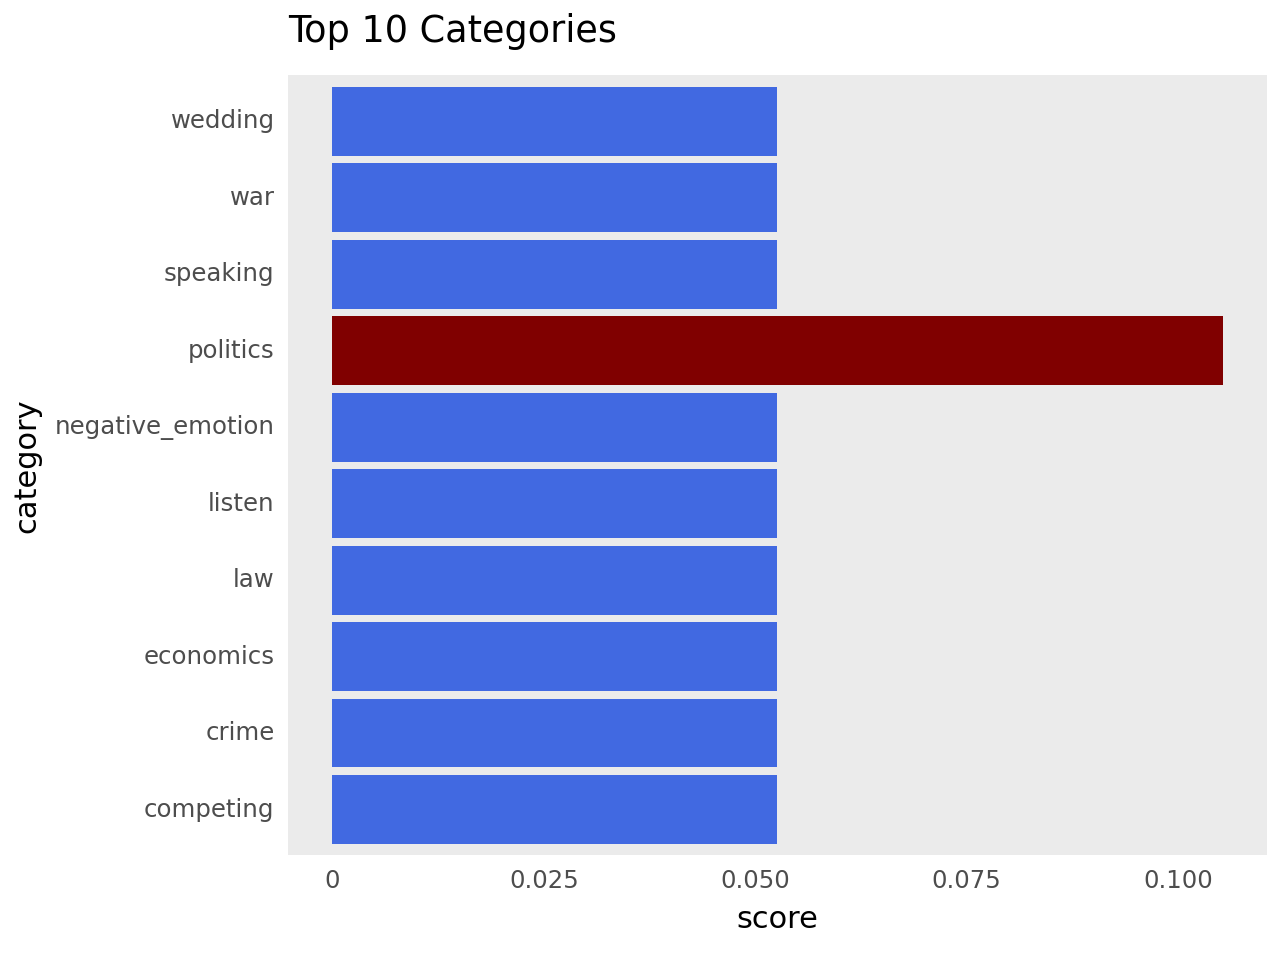

<Figure Size: (640 x 480)>

In [138]:
(ggplot(sentiment_df, aes(x = "category" , y = "score", fill="score")) +
        geom_bar(stat='identity', position='stack') +
        coord_flip () +
        scale_fill_gradient(low = "royalblue", high = "maroon", guide=False) +
        labs(title="Top 10 Categories", x=None, y=None, fill= None) +
     #   theme_bw() + 
        theme(panel_grid=element_blank(), axis_ticks = element_blank()))

***
***

<div class="alert alert-block alert-success">


# Checkpoint 15

Now you try!

Let's explore the tool with some more examples. What happens in cases of sarcasm, negation, or very informal text?

Identify three sentences: One that is sarcastic, one that negates, and an informal text with slang. 

Repeat the same steps as above with your three sentences. 

What categories do you pick up? Which are the top categories for each sentence?

In [144]:
Sarcastic= "Oh, great! Another flat tire on my way to work. Just what I needed to make my day perfect."

Negating= "I don't think it's possible to finish this project ahead of schedule. It's practically impossible with the current resources."

Informal = "Hey, wanna grab some grub later? I heard there's this new joint that serves bomb burgers. Let's check it out, it's gonna be lit!"

In [146]:
sentiment_tokens1 = lexicon.analyze(nltk.word_tokenize(Sarcastic), normalize=True)

In [147]:
sentiment_tokens2 = lexicon.analyze(nltk.word_tokenize(Negating), normalize=True)

In [148]:
sentiment_tokens3 = lexicon.analyze(nltk.word_tokenize(Informal), normalize=True)

In [149]:
[(k,v) for k,v in sentiment_tokens1.items() if v > 0]

[('attractive', 0.043478260869565216),
 ('business', 0.043478260869565216),
 ('driving', 0.043478260869565216),
 ('vehicle', 0.043478260869565216),
 ('work', 0.043478260869565216),
 ('car', 0.043478260869565216),
 ('shape_and_size', 0.043478260869565216),
 ('beauty', 0.043478260869565216),
 ('achievement', 0.043478260869565216),
 ('positive_emotion', 0.043478260869565216)]

In [150]:
[(k,v) for k,v in sentiment_tokens2.items() if v > 0]

[('office', 0.041666666666666664),
 ('college', 0.041666666666666664),
 ('business', 0.041666666666666664),
 ('meeting', 0.08333333333333333),
 ('science', 0.041666666666666664),
 ('work', 0.08333333333333333)]

In [151]:
[(k,v) for k,v in sentiment_tokens3.items() if v > 0]

[('movement', 0.029411764705882353),
 ('hearing', 0.029411764705882353),
 ('listen', 0.029411764705882353),
 ('fire', 0.029411764705882353),
 ('terrorism', 0.029411764705882353),
 ('weapon', 0.029411764705882353)]

### Sentiment Analysis Part 2: Amazon Reviews

***

For this section of the sentiment analysis module, we'll be working with an Amazon Fine Foods Reviews dataset that can be found on [Kaggle](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews?select=Reviews.csv) which is a platform where individuals can participate in competitions and coding projects using Notebooks just like the ones you've been using for this class!

The data contains:

    Reviews from Oct 1999 - Oct 2012
    568,454 reviews
    256,059 users
    74,258 products
    260 users with > 50 reviews

The variables included are:
    
`Id` Row ID \
`ProductId` Product identifier \
`UserId` User who wrote the review \
`ProfileName` User profile name \
`HelpfulnessNumerator` Number of users who found the review helpful \
`HelpfulnessDenominator` Number of users who indicated whether they found the review helpful or not \
`Score` Rating between 1-5 \
`Time` Timestamp of review (? unclear what the format is) \
`Summary` Summary of text \
`Text` Raw text from the review.

First, let's read in the data. This can be found in the Data folder in a file called `Reviews.csv`.

In [139]:
reviews = pd.read_csv('Data/Reviews.csv')
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


For this exercise, let's compare the sentiment scores of these reviews to the ratings they correspond to in order to determine whether the ratings and reviews are consistent. To do this, first we'll need to preprocess the text (i.e., tokenize) and then analyze it to get a sentiment score for the review. 

The columns we need in order to evaluate this are `Score` and `Text`, so let's extract those from the dataframe.

In [140]:
review_text = reviews[['Score', 'Text']]
review_text.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In order to calculate the polarity scores (positive, neutral, negative, etc.) for each of the sentences, we're going to use NLTK's sentiment analyzer that will output polarities for a given sentence. We will then extract the 'compound' measure that is on a scale from 0-1, where 0 is negative and 1 is positive. 

In [141]:
from nltk.sentiment import SentimentIntensityAnalyzer
from pandarallel import pandarallel
# initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()
# create a wrapper function that can be applied to our series
def calc_extract_sent(sentence):
    return sia.polarity_scores(sentence)['compound']

ModuleNotFoundError: No module named 'pandarallel'

This data is really large - in the hundreds of thousands of reviews. In order to make this run a bit more efficiently, we can use the package `pandarallel` to "parallelize" the process. This means that the text examples will be split up into several groups (however many we set - based on the number of workers) and the processes for multiple examples will happen at the same time. This will still take a moment, but setting `progress_bar` to `True` will allow us to watch how much faster this process is when we parallelize it. The process below  would have taken approximately 5 times as long otherwise!

In [142]:
# there will be 5 processes running at once
pandarallel.initialize(nb_workers = 5, use_memory_fs = False, progress_bar = True) 
sentiments = review_text.Text.parallel_apply(calc_extract_sent)

NameError: name 'pandarallel' is not defined

Let's see what we have!

In [143]:
sentiments.head()

NameError: name 'sentiments' is not defined

We can see above that there is now a sentiment score for each of the reviews and we can use these scores to compare to the review scores. There's one other problem we have to solve first - we need to make the user scores and the polarity values comparable. Right now, the user scores are on an ordinal scale from 1-5 and the polarity scores are from -1 to 1. We need to categorize both the user scores and the polarity scores into "positive" and "negative". We will encode positive as 1 and negative as -1.

In [ ]:
sents_encoded = [1 if score > 0 else -1 for score in sentiments]
sents_encoded[:5]

In [ ]:
scores_encoded = [1 if user_score > 3 else -1 for user_score in review_text.Score]
scores_encoded[:5]

For the first 5 above, it looks like the sentiment analyzer is pretty spot on! Cool! Let's see how well we did overall. If the scores match (i.e., the user score was categorized as positive or negative and the polarity score is the same) then we'll say the user score matches the review sentiment. Let's find the proportion of user scores that match the review text!

In [ ]:
match = 0
total = len(sents_encoded) # this is the number of reviews
for i in range(len(sents_encoded)):
    if sents_encoded[i] == scores_encoded[i]:
        match += 1
print(f"Percentage of reviews where user score matches polarity score: {round(match / total * 100, 2)}")

Super interesting! Using the method above, it would appear that approximately 82% of the time the polarity score would indicate a review was positive or negative when the user score also indicated that the review was positive or negative (assuming anything less than a 4 is negative). It would be interesting to try this with the summaries, right? Feel free to do this again, using the summaries instead of the text and see how well the analyzer does.

***
***

<div class="alert alert-block alert-warning">

***Be sure to turn off your kernel before closing!***
    
<p style="text-align:center;">
        <img src=Images/Best_Practice.png width=500 class="center">
</p>

</div>